In this notebook, I'm going to be collecting the candidate lists of Dutch parties for the 2021 pariamentary elections. In no particular order, just guided by availability, Google hit priority and also driven primarily by the parties in the Peilingwijzer.

# CU

In [528]:
import requests
from lxml import html
import pdfx
import re
import numpy as np
import pandas as pd

import pickle

In [129]:
def load_and_save_page(filename, url):
    try:
        with open(filename, 'rb') as fh:
            page = fh.read()
    except FileNotFoundError:
        print("Downloading new page")
        page = requests.get(url).content
        with open(filename, 'wb') as fh:
            fh.write(page)
    return page

In [132]:
filename = 'candidates_CU_page_20201115.html'
url = 'https://www.christenunie.nl/kandidatenlijst'

CU_tree = html.fromstring(load_and_save_page(filename, url))

In [133]:
CU_candidate_divs = CU_tree.xpath('//div[@class="col column2"]')

In [161]:
def remove_punctuation(*strings):
    output = []
    punctuation = "(),.|#"
    for string in strings:
        for char in punctuation:
            string = string.replace(char, '')
        output.append(string)
#     spaces = "\xa0\xb0"
#     strings = output
#     output = []
#     for string in strings:
#         for char in spaces:
#             string = string.replace(char, ' ')
#         output.append(string)
    return output

In [155]:
CU_candidates = {}
for div in CU_candidate_divs:
    naam = div.xpath('p/strong/text()')[0]
    positie, plaats_jaar, CV = div.xpath('p/text()')
    positie, plaats_jaar = remove_punctuation(positie, plaats_jaar)
    plaats_jaar = plaats_jaar.strip().split()
    jaar = plaats_jaar[-1]
    plaats = " ".join(plaats_jaar[:-1])
    CU_candidates[naam] = {
        'positie': positie.strip(),
        'plaats': plaats,
        "jaar": jaar,
        "CV": CV
    }

# CDA

In [137]:
filename = 'candidates_CDA_page_20201115.html'
url = 'https://www.cda.nl/kandidaten-2021'

CDA_tree = html.fromstring(load_and_save_page(filename, url))

In [23]:
CDA_candidate_divs = CDA_tree.xpath('//a[@class="person"]')

In [157]:
CDA_candidates = {}
for div in CDA_candidate_divs:
    naam = div.xpath('h3/span/text()')[0].replace('\t', ' ')
    positie_plaats = div.xpath('h4/span/text()')
    positie_plaats = remove_punctuation(*positie_plaats)[0].split()
    positie = positie_plaats[0]
    plaats = " ".join(positie_plaats[1:])
    CDA_candidates[naam] = {
        'positie': positie.strip(),
        'plaats': plaats,
    }

# D66

In [138]:
filename = "candidates_D66_20201115.pdf"
url = "https://d66.nl/wp-content/uploads/2020/11/D66_Advieslijst_TK2021.pdf"

_ = load_and_save_page(filename, url)

In [139]:
pdf = pdfx.PDFx(filename)
text = pdf.get_text().split('\n')

In [393]:
D66_candidates = {}
ix = 0
positie = 1
name_part = None
for line in text[16:]:
    if line == '' or '.' in line or '\x0c' in line:
        continue
    elif line in ['Marijke van ', 'Hind ', 'Marleen ', 'Ojanne ', 'Emma Laurijssens ']:
        name_part = line
    elif ix == 0:
        if name_part is not None:
            naam = name_part + line
            name_part = None
        else:
            naam = line
        D66_candidates[naam] = {'positie': positie}
        positie += 1
        ix += 1
    elif ix == 1:
        D66_candidates[naam]['plaats'] = line.strip()
        ix += 1
    elif ix == 2:
        leeftijd = line.split()[0]
        D66_candidates[naam]['jaar'] = 2020 - int(leeftijd) # good enough estimate
        ix = 0

# fix order, pdf sucks
for naam, candidate in D66_candidates.items():
    if 6 <= candidate['positie'] < 12:
        candidate['positie'] += 1
    if 23 <= candidate['positie'] < 34:
        candidate['positie'] += 2
    if 29 <= candidate['positie'] <= 32:
        candidate['positie'] += 2
    if 57 <= candidate['positie'] <= 61:
        candidate['positie'] -= 1
D66_candidates['Steven van Weyenberg']['positie'] = 6
D66_candidates['Alexander Hammelburg']['positie'] = 23
D66_candidates['Rens Raemakers']['positie'] = 24
D66_candidates['Sjoerd Warmerdam']['positie'] = 29
D66_candidates['Hind Dekker-Abdulaziz']['positie'] = 30
D66_candidates['Bas de Leeuw']['positie'] = 61

# GroenLinks

In [142]:
url = "https://groenlinks.nl/nieuws/groenlinks-presenteert-team-voor-verandering-2021"
filename = "candidates_GL_20201115.html"

GL_tree = html.fromstring(load_and_save_page(filename, url))

In [181]:
GL_candidates = {}
for candidate in GL_tree.xpath('//main/div/div/div/div/p/text()')[5:]:
    positie, *naam_CV = candidate.split(sep='.')
    naam_CV = '.'.join(naam_CV)  # one typo, . instead of ,
    naam, *CV = naam_CV.split(sep=',')
    if len(CV) == 0:             # again because of same typo
        naam, *CV = naam_CV.split(sep='.')
    CV = ','.join(CV)
    GL_candidates[naam.strip()] = {
        "positie": int(positie.strip()),
        "CV": CV.strip()
    }

# SP

In [189]:
url = "https://www.sp.nl/nieuws/2020/09/concept-kandidatenlijst-tweede-kamer-2021"
filename = "candidates_SP_20201115.html"

SP_tree = html.fromstring(load_and_save_page(filename, url))

In [237]:
CVs1_25_and_26_50[25:]

['26\xa0\xa0 \xa0Arnout Hoekstra (Vlaardingen, 1984)',
 '27\xa0\xa0 \xa0Michel Verschuren (Breda, 1984)',
 '28\xa0\xa0 \xa0Lieke van Rossum (Delft, 1982)',
 '29\xa0\xa0 \xa0Lies van Aelst (Gorinchem, 1988)',
 '30\xa0\xa0 \xa0Bram Roovers (Den Bosch, 1999)',
 '31\xa0\xa0 \xa0Marloes Piepers (Nijmegen, 1981)',
 '32\xa0\xa0 \xa0Erik Flentge (Amsterdam, 1967)',
 '33\xa0\xa0 \xa0Hans van Hooft (Nijmegen, 1966)',
 '34\xa0\xa0 \xa0Eric van den Broek (Boxtel, 1971)',
 '35\xa0\xa0 \xa0Iris van de Kolk (Alphen aan den Rijn, 1993)',
 '36\xa0\xa0 \xa0Sebastiaan van den Hout (Rijswijk, 1993)',
 '37\xa0\xa0 \xa0Thomas van Halm (Leiden, 1994)',
 '38\xa0\xa0 \xa0David de Vreede (Almere, 1990)',
 '39\xa0\xa0 \xa0Arda Gerkens (Haarlem, 1965)',
 '40\xa0\xa0 \xa0Spencer Zeegers (Uden, 1954)',
 '41 t/m 48 regionale kandidaten',
 '49\xa0\xa0 \xa0Ronald van Raak (Amsterdam, 1969)',
 '50\xa0\xa0 \xa0Emile Roemer (Boxmeer, 1962)']

In [242]:
positie_naam_1_25 = SP_tree.xpath('//div[@class="field-item even"]/h3/text()')
plaats_jaar_1_25 = SP_tree.xpath('//div[@class="field-item even"]/p/strong/text()')
CVs1_25_and_26_50 = [a for a in SP_tree.xpath('//div[@class="field-item even"]/p/text()')[-70:] if a != '\xa0']

SP_candidates = {}
for candidate in zip(positie_naam_1_25, plaats_jaar_1_25, CVs1_25_and_26_50[:25]):
    positie, *naam = remove_punctuation(*candidate[0].split())
    naam = " ".join(naam)
    *plaats, jaar = remove_punctuation(*candidate[1].split())
    plaats = " ".join(plaats)
    SP_candidates[naam] = {
        'positie': positie,
        'plaats': plaats,
        'jaar': jaar,
        'CV': candidate[2]
    }

for candidate in CVs1_25_and_26_50[25:]:
    try:
        positie_naam, plaats_jaar = candidate.split(sep='(')
    except ValueError:
        continue
    positie, *naam = positie_naam.replace('\xa0', '').split()
    naam = " ".join(naam)
    *plaats, jaar = remove_punctuation(*plaats_jaar.split())
    plaats = " ".join(plaats)
    SP_candidates[naam] = {
        'positie': positie,
        'plaats': plaats,
        'jaar': jaar,
    }

# PvdD

In [246]:
url = "https://www.partijvoordedieren.nl/uploads/site/tweedekamer/Profielen-kandidaten-Tweede-Kamerverkiezingen-2021.pdf"
filename = "candidates_PvdD_20201115.pdf"

_ = load_and_save_page(filename, url)

pdf = pdfx.PDFx(filename)

In [267]:
PvdD_text = pdf.get_text().split('\n')
PvdD_text = [a.strip() for a in PvdD_text if a not in ['', ' ', '\x0c ', '\x0c']
                                          and 'Partijcongres PvdD 12' not in a
                                          and '/4' not in a][2:]

In [283]:
PvdD_candidates = {}
for line in PvdD_text:
    if 'geboren' in line and 'woonplaats' in line:
        CV = ""
        positie, *rest = line.split(sep='.')
        naam, *rest = ".".join(rest).split(sep='(')
        naam = naam.strip()
        jaar, *plaats = "(".join(rest).split(sep=',')
        jaar = jaar.split()[1]
        plaats = remove_punctuation(" ".join(','.join(plaats).split()[1:]))[0]
        PvdD_candidates[naam] = {
            'positie': positie,
            'jaar': jaar,
            'plaats': plaats
        }
    else:
        CV += " " + line
        PvdD_candidates[naam]['CV'] = CV.strip()

# FvD

In [287]:
url = "https://www.fvd.nl/lijst"
filename = "candidates_FvD_20201115.html"

FvD_tree = html.fromstring(load_and_save_page(filename, url))

In [354]:
FvD_candidates = {}
for candidate in FvD_tree.xpath('//div[@class="bio-container"]'):
    positie, *naam = candidate.xpath('div/div[@class="tk-lijst-naam"]/text()')[0].strip().split()
    positie = remove_punctuation(positie)[0]
    naam = " ".join(naam)
    CV = "".join(candidate.xpath('div[@class="tk-lijst-tekst"]/b/text()')
                  + candidate.xpath('div[@class="tk-lijst-tekst"]/text()'))
    jaar = re.search("\((\d+)\)", CV).group(1)
    FvD_candidates[naam] = {
        'positie': positie,
        'jaar': jaar,
        'CV': CV
    }

# Denk

In [357]:
# not announced yet
Denk_candidates = {
    'Farid Azarkan': {
        'positie': 1,
        'plaats': "Culemborg",
        'CV': 'lid Tweede Kamer'
    }
}

# 50PLUS

In [358]:
# not announced yet
_50PLUS_candidates = {
    'Liane den Haan': {
        'positie': 1,
        'plaats': "Woerden",
        'jaar': 1967,
        'CV': 'directeur/bestuurder van ANBO'
    }
}

# PvdT

In [359]:
# not announced yet, not even the front runner... so this is just a guess
PvdT_candidates = {
    'Henk Otten': {
        'positie': 1,
        'jaar': 1967,
#         'plaats': "",
        'CV': 'lid Eerste Kamer'
    }
}

# PVV

In [356]:
# not announced yet
PVV_candidates = {
    'Geert Wilders': {
        'positie': 1,
        'jaar': 1963,
        'plaats': "Den Haag",
        'CV': 'fractievoorzitter'
    }
}

# VVD

In [366]:
url = "https://www.vvd.nl/kandidatenlijst-tweede-kamerverkiezingen/"
# not yet announced on 15 Nov 2020
VVD_candidates = {
    'Mark Rutte': {
        'positie': 1,
        'jaar': 1967,
        'plaats': 'Den Haag',
        'CV': 'minister-president'
    }
}

# SGP

In [367]:
url = "https://sgp.nl/actueel/nieuws/sgp-kandidatenlijst-vernieuwd-en-continuiteit"
# not accessible on Sundays (which today, 15 Nov 2020, is)
SGP_candidates = {
    'Kees van der Staaij': {
        'positie': 1,
        'jaar': 1968,
        'plaats': 'Benthuizen',
        'CV': 'fractievoorzitter'
    }
}

# PvdA

In [368]:
# not announced yet
PvdA_candidates = {
    'Lodewijk Asscher': {
        'positie': 1,
        'jaar': 1974,
        'plaats': "Amsterdam",
        'CV': 'fractievoorzitter'
    }
}

# Put it all together

In [363]:
parties = ['VVD', 'PVV', 'CDA', 'D66', 'GL', 'SP', 'PvdA', 'CU', 'PvdD', '50PLUS', 'SGP', 'Denk', 'FvD', 'PvdT']

In [401]:
all_candidates = pd.DataFrame()

for party in parties:
    if party != '50PLUS':
        party_candidates = eval(party + '_candidates')
    else:
        party_candidates = _50PLUS_candidates

    for naam, candidate in party_candidates.items():
        candidate = candidate.copy()
        try:
            candidate["jaar"] = int(candidate["jaar"])
        except KeyError:
            pass
        candidate["positie"] = int(candidate["positie"])
        candidate["naam"] = naam
        candidate["partij"] = party
        all_candidates = all_candidates.append(candidate, ignore_index=True)

In [402]:
all_candidates

,CV,jaar,naam,partij,plaats,positie
0,minister-president,1967.0,Mark Rutte,VVD,Den Haag,1.0
1,fractievoorzitter,1963.0,Geert Wilders,PVV,Den Haag,1.0
2,NaN,NaN,Hugo de Jonge,CDA,Rotterdam,1.0
3,NaN,NaN,Pieter Omtzigt,CDA,Enschede,2.0
4,NaN,NaN,Inge Van Dijk,CDA,Gemert-Bakel,3.0
...,...,...,...,...,...,...
294,"Frederik Jansen (1992) is politicoloog, belei...",1992.0,Frederik Jansen,FvD,NaN,7.0
295,"Wybren van Haga (1967) is ingenieur, oud-luite...",1967.0,Wybren van Haga,FvD,NaN,8.0
296,Jan Cees Vogelaar (1962) is agrarisch ondernem...,1962.0,Jan Cees Vogelaar,FvD,NaN,9.0
297,Hans Smolders (1960) is oud-topsporter en ond...,1960.0,Hans Smolders,FvD,NaN,10.0


<AxesSubplot:>

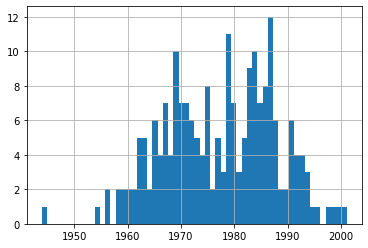

In [405]:
all_candidates.jaar.hist(bins=int(all_candidates.jaar.max()-all_candidates.jaar.min()+1))

In [415]:
import geocoder
import ipyleaflet

In [413]:
amsterdam = geocoder.osm("Amsterdam")

In [417]:
amsterdam.json['lat'], amsterdam.json['lng']

(52.3727598, 4.8936041)

In [435]:
plaatsen = {}

In [441]:
import tqdm.notebook as tqdm

In [525]:
for plaats in tqdm.tqdm(all_candidates.plaats):
    if plaats and not plaatsen.get(plaats):
        plaatsen[plaats] = geocoder.osm(plaats)
del plaatsen[np.nan]
plaatsen['Borne'] = geocoder.osm('Borne, Nederland')
plaatsen['Goes'] = geocoder.osm('Goes, NL')
plaatsen['Elburg'] = geocoder.osm('Elburg, NL')
plaatsen['Warten gemeente Leeuwarden'] = geocoder.osm('Warten, Leeuwarden')
plaatsen['Sint Maarten'] = geocoder.osm("Sint Maarten (Nederland)")

In [526]:
for plaatsnaam, data in plaatsen.items():
    try:
        if data.json["country_code"] != 'nl':
            print(plaatsnaam)
    except:
        print(plaatsnaam)

In [527]:
center = (52.15371445951162, 5.943603515625001)

kaart = ipyleaflet.Map(center=center, zoom=7)

for ix, candidate in all_candidates.iterrows():
    if plaatsen.get(candidate.plaats):
        plaats = plaatsen[candidate.plaats] 
        marker = ipyleaflet.Marker(location=(plaats.json['lat'], plaats.json['lng']))
        kaart.add_layer(marker)

display(kaart)

Map(center=[52.15371445951162, 5.943603515625001], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [533]:
plaatsen_json = {plaatsnaam: plaats.json for plaatsnaam, plaats in plaatsen.items()}

In [543]:
with open('candidates.pkl', 'wb') as fh:
    pickle.dump(all_candidates.to_dict(), fh)
with open('candidate_plaatsen.pkl', 'wb') as fh:
    pickle.dump(plaatsen_json, fh)